# Case Study: How Does a Bike-Share Navigate Speedy Success?

## Business task

# How do annual members and casual riders use Cyclistic bikes differently?

# Scenario

You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company. The director
of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore,
your team wants to understand how casual riders(without annual membership) and annual members(with annual membership) use Cyclistic bikes differently. From these insights,
your team will design a new marketing strategy to convert casual riders into annual members.

# Data Preparation

we will use Cyclistic’s historical trip data to analyze and identify trends. data can be found at [https://divvy-tripdata.s3.amazonaws.com/index.html] this link. Data is organised on a monthly basis and we are using data for year 2021 all months. This dataset is publicly available and is reliable, cited, original.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Checking sample files shape

In [3]:
d1 = pd.read_csv("202101-divvy-tripdata.csv")
d1.shape

(96834, 13)

In [4]:
d2 = pd.read_csv("202102-divvy-tripdata.csv")
d2.shape

(49622, 13)

In [5]:
d3 = pd.read_csv("202109-divvy-tripdata.csv")
d3.shape

(756147, 13)

seems like all datasets are having same number of columns so can join them vertically

# Merging all data files

In [6]:
from glob import glob 

In [12]:
data_file = sorted(glob('2021*.csv'))
data_file

['202101.csv',
 '202102.csv',
 '202103.csv',
 '202104.csv',
 '202105.csv',
 '202106.csv',
 '202107.csv',
 '202108.csv',
 '202109.csv',
 '202110.csv',
 '202111.csv',
 '202112.csv']

In [13]:
%%time
merged_data = pd.concat(pd.read_csv(file).assign(source_file_name = file) for file in data_file)
merged_data

Wall time: 33.8 s


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,source_file_name
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.890000,-87.720000,member,202101.csv
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.900000,-87.690000,member,202101.csv
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.900000,-87.700000,member,202101.csv
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.920000,-87.690000,member,202101.csv
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.900000,-87.700000,casual,202101.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247535,847431F3D5353AB7,electric_bike,2021-12-12 13:36:55,2021-12-12 13:56:08,Canal St & Madison St,13341,NaN,NaN,41.882289,-87.639752,41.890000,-87.610000,casual,202112.csv
247536,CF407BBC3B9FAD63,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,Canal St & Madison St,13341,Kingsbury St & Kinzie St,KA1503000043,41.882123,-87.640053,41.889106,-87.638862,member,202112.csv
247537,60BB69EBF5440E92,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,Canal St & Madison St,13341,Dearborn St & Monroe St,TA1305000006,41.881956,-87.639955,41.880254,-87.629603,member,202112.csv
247538,C414F654A28635B8,electric_bike,2021-12-13 09:00:26,2021-12-13 09:14:39,Lawndale Ave & 16th St,362.0,NaN,NaN,41.860000,-87.720000,41.850000,-87.710000,member,202112.csv


# changing data types to desired format

In [17]:
merged_data['started_at'] = pd.to_datetime(merged_data.started_at)

In [19]:
merged_data['ended_at'] = pd.to_datetime(merged_data.ended_at)

In [21]:
merged_data['ride_length'] = merged_data['ended_at'] - merged_data['started_at']

In [23]:
merged_data['weekday'] = pd.DatetimeIndex(merged_data['started_at']).weekday

In [27]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5595063 entries, 0 to 247539
Data columns (total 16 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       object         
 2   started_at          datetime64[ns] 
 3   ended_at            datetime64[ns] 
 4   start_station_name  object         
 5   start_station_id    object         
 6   end_station_name    object         
 7   end_station_id      object         
 8   start_lat           float64        
 9   start_lng           float64        
 10  end_lat             float64        
 11  end_lng             float64        
 12  member_casual       object         
 13  source_file_name    object         
 14  ride_length         timedelta64[ns]
 15  weekday             int64          
dtypes: datetime64[ns](2), float64(4), int64(1), object(8), timedelta64[ns](1)
memory usage: 725.7+ MB


In [4]:
# this works while working with numpy arrays to convert scientific notation to float.
np.set_printoptions(suppress=True)

In [5]:
# this works while working with pandas dataframe to convert scientific notation to float.
pd.options.display.float_format = '{:.2f}'.format

In [34]:
merged_data.describe()

,start_lat,start_lng,end_lat,end_lng,ride_length,weekday
count,5595063.00,5595063.00,5590292.00,5590292.00,5595063,5595063.00
mean,41.90,-87.65,41.90,-87.65,0 days 00:21:56.120689615,3.18
std,0.05,0.03,0.05,0.03,0 days 02:58:20.085105105,2.00
min,41.64,-87.84,41.39,-88.97,-1 days +23:01:58,0.00
25%,41.88,-87.66,41.88,-87.66,0 days 00:06:45,1.00
50%,41.90,-87.64,41.90,-87.64,0 days 00:12:00,3.00
75%,41.93,-87.63,41.93,-87.63,0 days 00:21:47,5.00
max,42.07,-87.52,42.17,-87.49,38 days 20:24:09,6.00


In [39]:
# resetting index for merged dataset.
merged_data = merged_data.reset_index(drop= True)

In [41]:
merged_data.index

RangeIndex(start=0, stop=5595063, step=1)

In [42]:
%%time
# saving processed data to csv.
merged_data.to_csv('merged_data.csv')

Wall time: 1min 43s


In [2]:
data =pd.read_csv('merged_data.csv')
data.head()

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,source_file_name,ride_length,weekday
0,0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member,202101.csv,0 days 00:10:25,5
1,1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member,202101.csv,0 days 00:04:04,2
2,2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member,202101.csv,0 days 00:01:20,3
3,3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member,202101.csv,0 days 00:11:42,3
4,4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual,202101.csv,0 days 00:00:43,5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5595063 entries, 0 to 5595062
Data columns (total 17 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   ride_id             object 
 2   rideable_type       object 
 3   started_at          object 
 4   ended_at            object 
 5   start_station_name  object 
 6   start_station_id    object 
 7   end_station_name    object 
 8   end_station_id      object 
 9   start_lat           float64
 10  start_lng           float64
 11  end_lat             float64
 12  end_lng             float64
 13  member_casual       object 
 14  source_file_name    object 
 15  ride_length         object 
 16  weekday             int64  
dtypes: float64(4), int64(2), object(11)
memory usage: 725.7+ MB


In [2]:
#upon reloading data we find that its data types changed to object type, so we will again convert it to desired data types.

In [4]:
data['started_at'] = pd.to_datetime(data.started_at)

In [5]:
data['ended_at'] = pd.to_datetime(data.ended_at)

In [6]:
data['ride_length'] = pd.to_timedelta(data.ride_length)

In [7]:
data['month'] = pd.DatetimeIndex(data.started_at).month

In [8]:
# creating new column by ride_time converting ride_length column datatype to integer.

data['ride_time'] = data['ride_length'].dt.total_seconds().div(60).astype(int)

In [9]:
data.head()

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,source_file_name,ride_length,weekday,month,ride_time
0,0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member,202101.csv,0 days 00:10:25,5,1,10
1,1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member,202101.csv,0 days 00:04:04,2,1,4
2,2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member,202101.csv,0 days 00:01:20,3,1,1
3,3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member,202101.csv,0 days 00:11:42,3,1,11
4,4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual,202101.csv,0 days 00:00:43,5,1,0


In [10]:
# dropping columns which are not required.
data = data.drop(columns=['Unnamed: 0','start_lat','start_lng','end_lat','end_lng','source_file_name'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5595063 entries, 0 to 5595062
Data columns (total 13 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       object         
 2   started_at          datetime64[ns] 
 3   ended_at            datetime64[ns] 
 4   start_station_name  object         
 5   start_station_id    object         
 6   end_station_name    object         
 7   end_station_id      object         
 8   member_casual       object         
 9   ride_length         timedelta64[ns]
 10  weekday             int64          
 11  month               int64          
 12  ride_time           int32          
dtypes: datetime64[ns](2), int32(1), int64(2), object(7), timedelta64[ns](1)
memory usage: 533.6+ MB


In [16]:
data.describe()

,ride_length,weekday,month,ride_time
count,5595063,5595063.00,5595063.00,5595063.00
mean,0 days 00:21:56.120689615,3.18,7.42,21.45
std,0 days 02:58:20.085105105,2.00,2.49,178.33
min,-1 days +23:01:58,0.00,1.00,-58.00
25%,0 days 00:06:45,1.00,6.00,6.00
50%,0 days 00:12:00,3.00,8.00,12.00
75%,0 days 00:21:47,5.00,9.00,21.00
max,38 days 20:24:09,6.00,12.00,55944.00


In [17]:
%%time
data.to_csv('final_data.csv')

Wall time: 1min 18s


# Let's analyse dataset

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

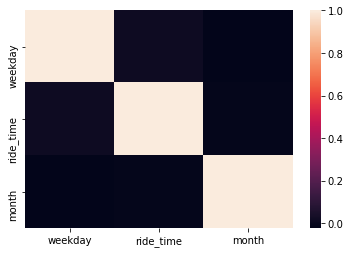

In [36]:
sns.heatmap(data.corr())

as we can see there is no corelation between variables in our data.

In [37]:
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,source_file_name,ride_length,weekday,ride_time,month
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,member,202101.csv,0 days 00:10:25,5,10,1
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,member,202101.csv,0 days 00:04:04,2,4,1
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,member,202101.csv,0 days 00:01:20,3,1,1
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,member,202101.csv,0 days 00:11:42,3,11,1
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,casual,202101.csv,0 days 00:00:43,5,0,1


# Analysing user types

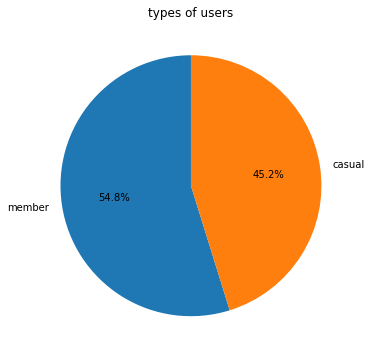

In [60]:
member = data.member_casual.value_counts()
plt.figure(figsize=(12,6))
plt.title('types of users')
plt.pie(member, labels=member.index, autopct='%1.1f%%', startangle=90);

For year 2021, there were 54.8% of users with annual membership, 45.2% of users without annual membership.

# Analysing rides on monthly basis

In [40]:
monthly_rides = data.month.value_counts().sort_index()

<AxesSubplot:ylabel='month'>

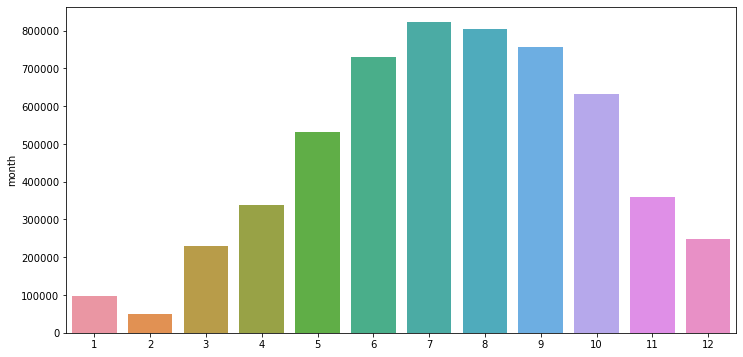

In [58]:
plt.figure(figsize=(12,6))
sns.barplot(x= monthly_rides.index , y= monthly_rides )

<AxesSubplot:title={'center':'Monthly ride usage'}, xlabel='month', ylabel='count'>

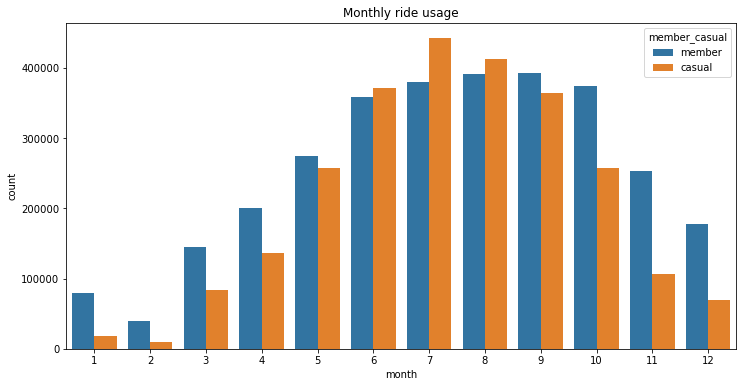

In [57]:
plt.figure(figsize=(12,6))
plt.title("Monthly ride usage")
sns.countplot(data= data, x= data.month, hue= data.member_casual ) 

There is a clear uptrend in number of rides from January to July and peaked in July after that trend goes down till december.
also casual riders(not having membership) took more number of rides than members in month of June, July and August.

# Weekday analysis of rides

In [62]:
week_day_rides = data.weekday.value_counts().sort_index()

<AxesSubplot:ylabel='weekday'>

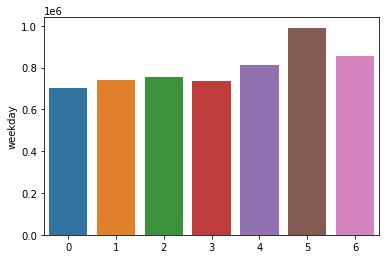

In [64]:
sns.barplot(x= week_day_rides.index, y= week_day_rides)

<AxesSubplot:title={'center':'weekly ride usage'}, ylabel='weekday'>

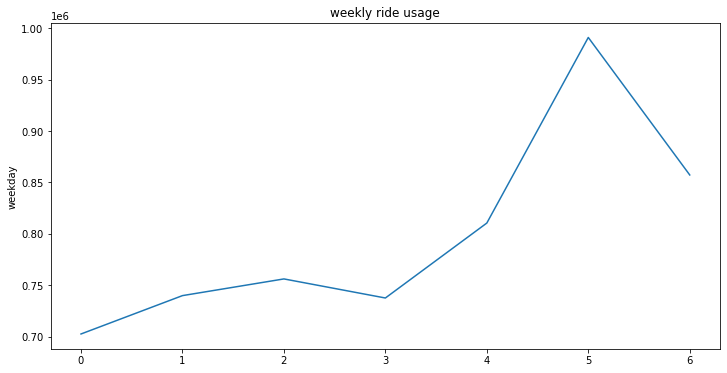

In [73]:
plt.figure(figsize=(12,6))
plt.title("weekly ride usage")
sns.lineplot( x= week_day_rides.index,y= week_day_rides  )

this plot shows bikes are used more on weekends. And MODE of data is on day 5 i.e. Saturday.




<AxesSubplot:title={'center':'weekly ride usage'}, xlabel='weekday', ylabel='count'>

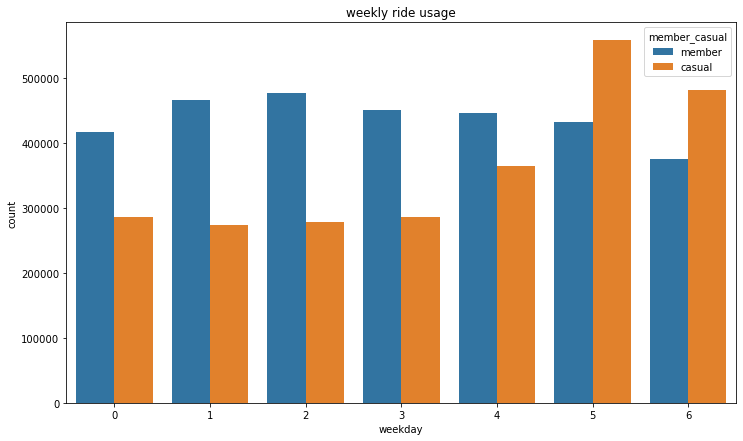

In [76]:
plt.figure(figsize=(12,7))
plt.title("weekly ride usage")
sns.countplot(data= data, x= data.weekday, hue= data.member_casual )

On 'weekends' casual members(without annual membership)  use more rides than annual members. And on 'weekdays' riders having 
annual membership are more than casual members.

# Analysing ride duration

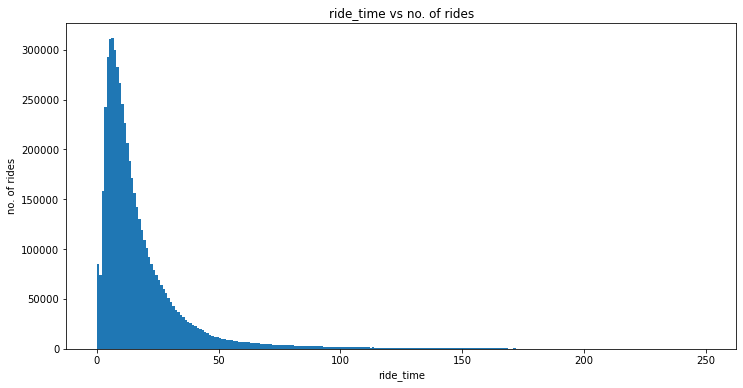

In [51]:
plt.figure(figsize=(12,6))
plt.title("ride_time vs no. of rides")
plt.xlabel('ride_time')
plt.ylabel('no. of rides')
plt.hist(x= data.ride_time, bins= 250,range=(0,250), histtype='stepfilled');

this histogram shows the distribution of number of rides and the duration of ride. 

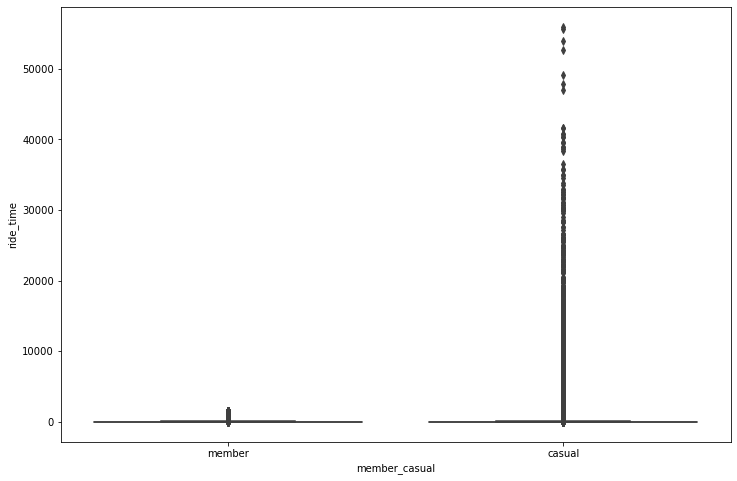

In [38]:
plt.figure(figsize=(12,8))
sns.boxplot(x=data.member_casual, y= data.ride_time);

From this boxplot we can infer that annual members generally use bikes for short duration, where as casual riders(without annual membership) uses bikes for longer duration.

In [2]:
data = pd.read_csv('final_data.csv')
data.head()

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,ride_length,weekday,month,ride_time
0,0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,member,0 days 00:10:25,5,1,10
1,1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,member,0 days 00:04:04,2,1,4
2,2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,member,0 days 00:01:20,3,1,1
3,3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,member,0 days 00:11:42,3,1,11
4,4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,casual,0 days 00:00:43,5,1,0


# statistics of Riding time of users

In [27]:
pd.DataFrame(data[['ride_time']].mean())

,0
ride_time,21.45


 Average riding time of all users is about 21-22 minutes.

In [12]:
data.groupby('member_casual')[['ride_time']].mean()

,ride_time
member_casual,
casual,31.51
member,13.14


 Average riding time of casual riders is about 31 minutes and average riding time of annual members is about 13 minutes.

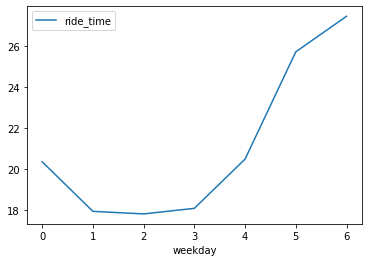

In [24]:
data.groupby('weekday')[['ride_time']].mean().plot();

<AxesSubplot:title={'center':'Average riding time of users on Weekdays'}, xlabel='weekday', ylabel='ride_time'>

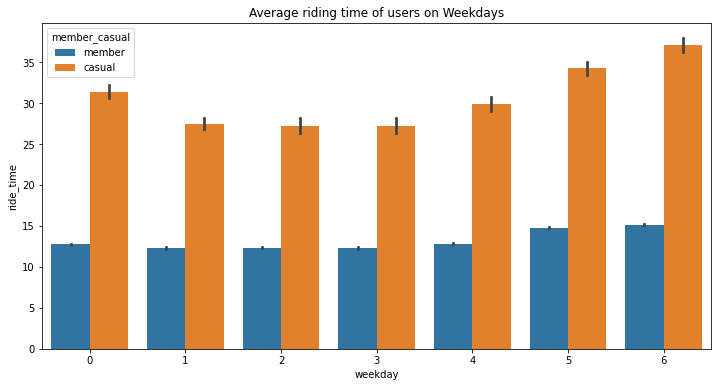

In [21]:
plt.figure(figsize=(12,6))
plt.title("Average riding time of users on Weekdays")
sns.barplot(data= data, x= data.weekday, y= data.ride_time,hue= data.member_casual)

 Above plots shows 'rising' trend of 'average riding time' as 'weekend' approaches. And casual users average riding time is more than members.

# Summary

From above analysis the following observations can be made :-

1) For year 2021, there were 54.8% of users with annual membership, 45.2% of users without annual membership.

2) There is a clear uptrend in number of rides from January to July and peaked in July after that trend goes down till        december. also casual riders(not having membership) took more number of rides than annual members in month of June, July    and August.

3) On 'weekends' casual members(without annual membership) use more rides than annual members. And on 'weekdays' riders        having annual membership are more than casual members.

4) Average riding time of casual riders is about 31 minutes and average riding time of annual members is about 13 minutes.

# Tableau Dashboard

#project dashboard link in Tableau

link :- https://public.tableau.com/app/profile/sachin.patel8488/viz/howcasualridersandannualmembersuseCyclisticbikesdifferently/Dashboard1

# References

>data sourse link -> https://divvy-tripdata.s3.amazonaws.com/index.html.

>Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html

>Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html

>Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html